In [1]:
#import tbmodels

#model.to_kwant()
import itertools
import importlib
import kwant
import tbmodels
tbmodels = importlib.import_module("tbmodels")

%load_ext autoreload
%autoreload 2
import tbmodels

from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/home/greschd/.virtualenvs/tbmodels_kwant_test/lib/python3.5/site-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


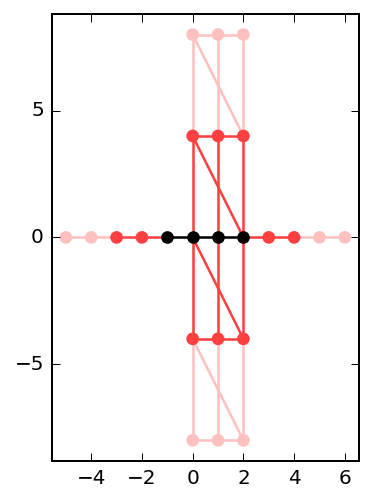

In [11]:
# Test - do simple square lattice 
model = tbmodels.Model(
    on_site=[1.3],
    dim=2,
    occ=0,
    pos=[[0., 0.]],
    uc = [[1, 0], [0, 1]]
)

t1 = 1.0
#for R in ([1,0],[0,1],[0,2],[0,3],[-2,4]): - throws an error 
for R in ([1,0],[0,1],[0,2],[0,3],[-2,4],[0,4]):
    model.add_hop(t1*0, 0, 0, R)
#print(model)
kwant_sys = model.to_kwant([3,1]);

kwant.plot(kwant_sys);

In [12]:
model = tbmodels.Model.from_hr_file('wannier90_hr.dat')
kwant_sys = model.to_kwant([5, 5, 5])
kwant.plot(kwant_sys);
plt.show()


ValueError: The following hopping connects non-neighboring lead unit cells. Only nearest-cell hoppings are allowed (consider increasing the lead period).
(Site(kwant.lattice.Monatomic([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], [0.0, 0.0, 0.0], 'tbmodels'), array([4, 2, -3])), Site(kwant.lattice.Monatomic([[1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]], [0.0, 0.0, 0.0], 'tbmodels'), array([4, 4, -8])))

In [ ]:
print(kwant_sys.finalized())